In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from wordcloud import WordCloud
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("resume_dataset.csv")
df.head()


,resume_text,category
0,Experienced professional in Data Science. Skil...,Data Science
1,Experienced professional in Data Science. Skil...,Data Science
2,Experienced professional in Data Science. Skil...,Data Science
3,Experienced professional in Data Science. Skil...,Data Science
4,Experienced professional in Data Science. Skil...,Data Science


In [4]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = text.lower()
    return " ".join(w for w in text.split() if w not in STOPWORDS)

df["cleaned_text"] = df["resume_text"].apply(clean_text)


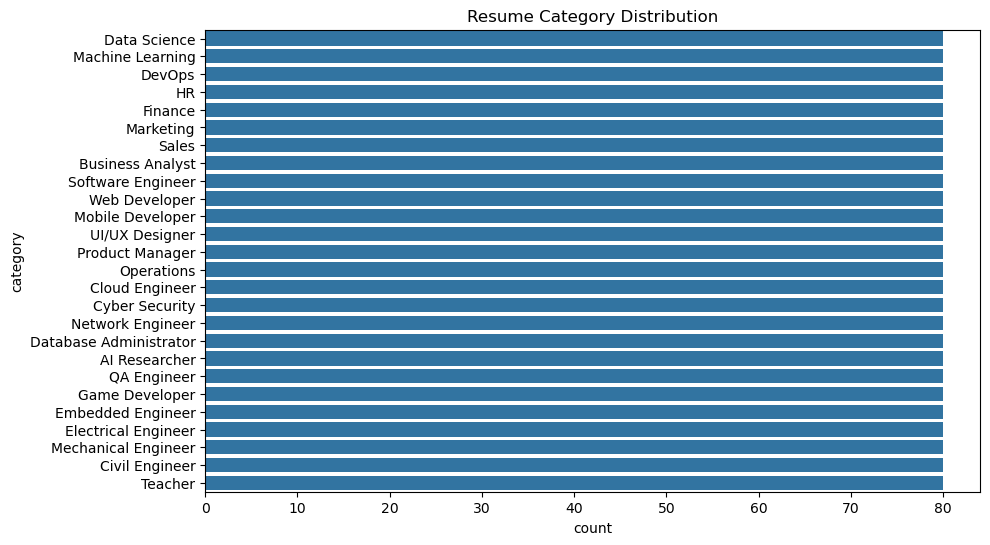

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="category",
              order=df["category"].value_counts().index)
plt.title("Resume Category Distribution")
plt.show()


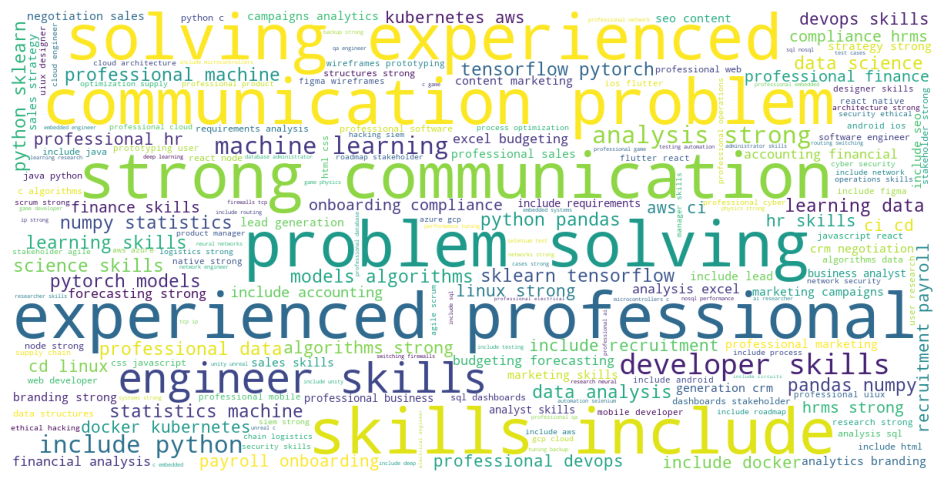

In [6]:
all_text = " ".join(df["cleaned_text"])
wc = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [7]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = tfidf.fit_transform(df["cleaned_text"])
y = df["category"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
model = OneVsRestClassifier(
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    )
)

model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 max_iter=1000))

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                        precision    recall  f1-score   support

         AI Researcher       1.00      1.00      1.00        16
      Business Analyst       1.00      1.00      1.00        16
        Civil Engineer       1.00      1.00      1.00        16
        Cloud Engineer       1.00      1.00      1.00        16
        Cyber Security       1.00      1.00      1.00        16
          Data Science       1.00      1.00      1.00        16
Database Administrator       1.00      1.00      1.00        16
                DevOps       1.00      1.00      1.00        16
   Electrical Engineer       1.00      1.00      1.00        16
     Embedded Engineer       1.00      1.00      1.00        16
               Finance       1.00      1.00      1.00        16
        Game Developer       1.00      1.00      1.00        16
                    HR       1.00      1.00      1.00        16
      Machine Learning       1.00      1.00      1.00        16
             Marketing   

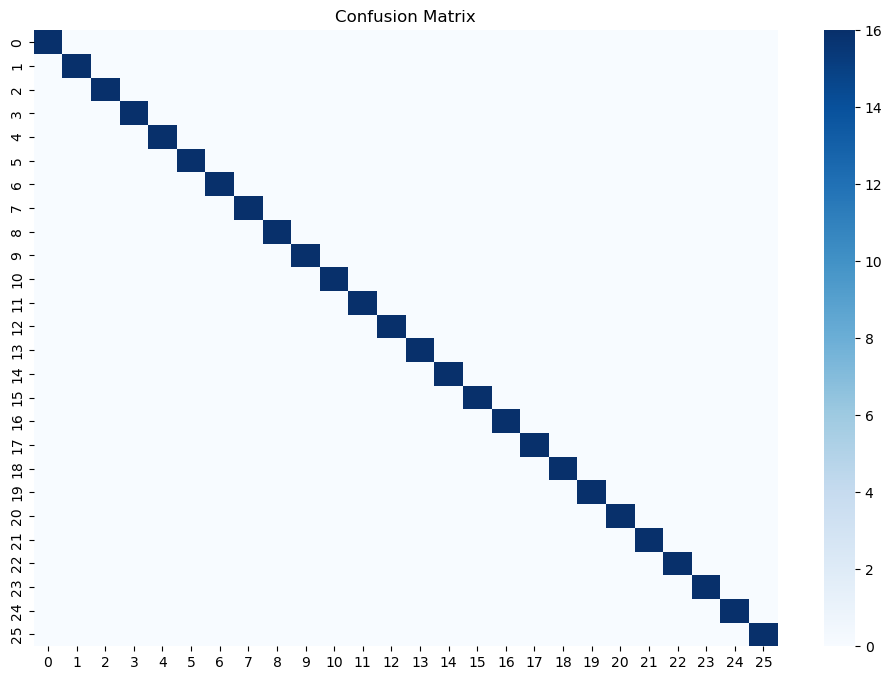

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [12]:
scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 1.0


In [14]:
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

print("Model and TF-IDF saved successfully!")


Model and TF-IDF saved successfully!
